<a href="https://colab.research.google.com/github/ktichola/Image-matching/blob/main/Reconstruction_using_hloc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'image-matching-challenge-2024:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F71885%2F8143495%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240514%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240514T114416Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D412e2f1ca49b15ecff55463a80c1399a5de1347f5f7a64cc02d0baa2c231bdc7975954036588a05039f411ff36000ab93a9fb0ce0165f674b2330c35be82e3f521fd3794f58b024fb79fb439e531820300b571befe3b37b7060b1807f1c8004a0143becc5aa06fc5f993253d41ead5a0ad038cc43c7ae10c1d4659c8ecff45ed5a6a745a20cdf623e68fd162c52c273d1f2057c7b9f89ca5538fb774d3487cb5bae447e0151fe20374dd513c20167ed9b3260042e926785c24b49293cc868cf7e62777ecca52043c7ea9693fbece49cfde9bde63b51743af070271f2095dda55c0bbb1d0cbe2936bbd3a6e5d85a13a253c03b01f08b2b803208bd15e42c36822,hloc-toolbox:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3270810%2F5689030%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240514%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240514T114416Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3d3f06b0df9063ec2daa7df32c5d5dc74d311176f751deeb1820f6cdc669da0b7be1977270c8168f56f99b8e11f3f05f4a307e27895026b8be841b78152e2d52b7fd56139c991300d2b7295199aa78c5b790fce27e0d127a93e7cba90d321f1feb64843d06d0c51da5167ffda970ba96fa051ab4df434a02360599ea4aa8a146a2cc5a8473483bcc5a90a3b2c454516d56b5852f09c2511cc22db634f296cd22373f67b754b8ea29a3225054cc3fbbc49249cbb96c0fd0c686e333986708521c38e2de102c9d7acb7f9334682690ff595b86166fcfe22c48243b4f6e104e82cd457569a11bb8783a6ed3b1c0330bfa9f6af9169860eadf0f5fbeca51f8a167cb,imc2023-hloc:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3369908%2F5860481%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240514%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240514T114416Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1204a2491b8e9f9fc0e8a422c40105298fb4125424da4f733a64593d14794dc1cc7e915f6d25ed4276d1e8b7da2dc4cf1ebec8c556c52f3df2dd4af4df63ed29c93599e8bea9da98bdce90e9d73c655c9fa5c02fa1de2d709a0f093c446a6a70a77975385fcad4521ab93b5106f15da15fd6b42425e28537e7d13f934c23a26a5c9a02357efd46c4e6b8becd798276eb13c33f5d448361dd3f2018dd3b92ff80c6ec67756233278d6b4e6664c559e5b7d5d21f9791edbd517c3c9bdb31816ee32acd556d2c46ccffa5538071d81e636f8e9096b485e4c067c452a1e5761903f6eef86f5785b8cb02915b91f5eeb05964639bbf1cdbb78dfc459866b656cc9fc8,imc2024-packages-lightglue-rerun-kornia:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4628051%2F7884485%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240514%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240514T114416Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0d8ed0cde54ab493526b10be0e55e8b9adfa7c0c315f3f964a3268526872945ff486fe6f0eb945e3eb34a96d2c3f31a0e0f686e9c72f65a0145417830c832b971abb36610d2856812a690dd38be81ddda3c32c0954f0486792bbed199fb946105abd175c946ee6a0dd4879ee0f667dea410929584586a8d1f2e4732c4d11545728ac9f7614591004f968b6be75a5808feb3efd1a901dcdc00d2f49bd52586c41f62b54f255a303add9f3c8d1ad85c032b37ca5bfa0f67c93f7e31fa1555839b46e0d2d9c6fd391e0fcefa225e59ab6c453bbcde513c470ffda1c001133f341a49a8ee9a6ad1c19135231016375429ecc430221d7db9630afebb83d5e5e00ce95,colmap-db-import:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4628331%2F7884725%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240514%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240514T114416Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6e1d01220a9d90250d2264fa029f5527bdf9ed51e072a0c490a089d5bc61541d0abe9159f28bc84c7d923d3c51b91cff9199bfdd64a41fa0f74c0747dc19073550e471e2375ddf18160e484a4bca0b0a9445cc0884186941b50726ae7f9ea91b10a129504db80825b45aa4f117508955848dcc4e32b7c6888f09a705a2e98899b5cc495f44d9ff4cb83d83ac7167b2330d53986542d9c0920afc8439d91d2a7131c06ccb48a582793d13ddf455923ea6b47eaf5d25f69e052a2c97bf62fb24970512a2980a6e94d62be52a63863ae270a708db62aaacc063689b1b9c1da12128d24e75348ef350ba742686915b9ba4b81e180951db02d4d8ca3fa3739ed1500e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


Thanks for https://www.kaggle.com/code/asarvazyan/imc-understanding-the-baseline

# Install Packages & Improve relevent models

In [ ]:
!git clone --quiet --recursive https://github.com/cvg/Hierarchical-Localization/
%cd Hierarchical-Localization
!pip install --progress-bar off --quiet -e .
!pip install --progress-bar off --quiet --upgrade plotly

/kaggle/working/Hierarchical-Localization


In [ ]:
import tqdm, tqdm.notebook
tqdm.tqdm = tqdm.notebook.tqdm  # notebook-friendly progress bars
from pathlib import Path

from hloc import extract_features, match_features, reconstruction, visualization, pairs_from_exhaustive, match_dense, pairs_from_retrieval
from hloc.visualization import plot_images, read_image
from hloc.utils import viz_3d
import gc

# Setting Paths about features，matches...

In [ ]:
images = Path('/kaggle/input/image-matching-challenge-2024/test/church/images')
outputs = Path('/kaggle/working/demo')
!rm -rf $outputs
sfm_pairs = outputs / 'pairs-sfm.txt'
loc_pairs = outputs / 'pairs-loc.txt'
sfm_dir = outputs / 'sfm'
features = outputs / 'keypoints.h5'
matches = outputs / 'matches.h5'
reference_sfm = outputs / "sfm_loftr"

# feature_conf = extract_features.confs['superpoint_aachen']
# matcher_conf = match_features.confs['superpoint+lightglue']

retrieval_conf = extract_features.confs["disk"]
matcher_conf = match_dense.confs["loftr"]

# Plot images

41 mapping images


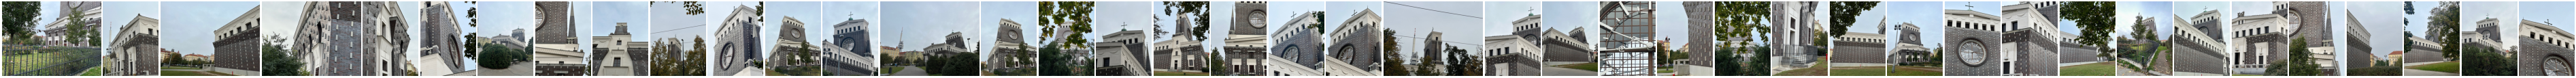

In [ ]:
references = [str(p.relative_to(images)) for p in (images).iterdir()]
print(len(references), "mapping images")
plot_images([read_image(images / r) for r in references], dpi=25)

# Extract features and matching

In [ ]:
# extract_features.main(retrieval_conf, images, image_list=references, feature_path=features)
global_descriptors = extract_features.main(retrieval_conf, images, outputs)
pairs_from_exhaustive.main(sfm_pairs, image_list=references)
match_dense.main(matcher_conf, sfm_pairs, images, outputs, features=features, matches=matches);

[2024/05/14 11:31:16 hloc INFO] Extracting local features with configuration:
{'model': {'max_keypoints': 5000, 'name': 'disk'},
 'output': 'feats-disk',
 'preprocessing': {'grayscale': False, 'resize_max': 1600}}
[2024/05/14 11:31:16 hloc INFO] Found 41 images in root /kaggle/input/image-matching-challenge-2024/test/church/images.
Downloading: "https://raw.githubusercontent.com/cvlab-epfl/disk/master/depth-save.pth" to /root/.cache/torch/hub/checkpoints/depth-save.pth


  0%|          | 0.00/4.17M [00:00<?, ?B/s]

  0%|          | 0/41 [00:00<?, ?it/s]

[2024/05/14 11:31:23 hloc INFO] Finished exporting features.
[2024/05/14 11:31:23 hloc INFO] Found 820 pairs.
[2024/05/14 11:31:23 hloc INFO] Extracting semi-dense features with configuration:
{'cell_size': 1,
 'max_error': 1,
 'model': {'name': 'loftr', 'weights': 'outdoor'},
 'output': 'matches-loftr',
 'preprocessing': {'dfactor': 8, 'grayscale': True, 'resize_max': 1024}}
Downloading: "http://cmp.felk.cvut.cz/~mishkdmy/models/loftr_outdoor.ckpt" to /root/.cache/torch/hub/checkpoints/loftr_outdoor.ckpt


  0%|          | 0.00/44.2M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
[2024/05/14 11:31:27 hloc INFO] Performing dense matching...


  0%|          | 0/820 [00:00<?, ?it/s]

[2024/05/14 11:35:39 hloc INFO] Assigning matches...
[2024/05/14 11:35:39 hloc INFO] Aggregating keypoints for 41 images.


  0%|          | 0/820 [00:00<?, ?it/s]

[2024/05/14 11:35:57 hloc INFO] Finished assignment, found 7303.7 keypoints/image (avg.), total 299453.
[2024/05/14 11:35:57 hloc INFO] Reassign matches with max_error=1.


  0%|          | 0/820 [00:00<?, ?it/s]

# Reconstruction

In [ ]:
model = reconstruction.main(sfm_dir, images, sfm_pairs, features, matches, image_list=references, mapper_options={"min_model_size": 3, # By default colmap does not generate a reconstruction if less than 10 images are registered. Lower it to 3.
        "max_num_models": 2})
gc.collect()

[2024/05/14 11:36:05 hloc INFO] Creating an empty database...
[2024/05/14 11:36:05 hloc INFO] Importing images into the database...
[2024/05/14 11:36:05 hloc INFO] Importing features into the database...


  0%|          | 0/41 [00:00<?, ?it/s]

[2024/05/14 11:36:06 hloc INFO] Importing matches into the database...


  0%|          | 0/820 [00:00<?, ?it/s]

[2024/05/14 11:36:06 hloc INFO] Performing geometric verification of the matches...
I20240514 11:36:06.917344   387 misc.cc:198] 
Custom feature matching
I20240514 11:36:06.919167   387 feature_matching.cc:1021] Matching block [1/1]
I20240514 11:38:30.353958   387 feature_matching.cc:46]  in 143.435s
I20240514 11:38:30.363127   387 timer.cc:91] Elapsed time: 2.391 [minutes]
[2024/05/14 11:38:30 hloc INFO] Running 3D reconstruction...
I20240514 11:38:30.401454   396 misc.cc:198] 
Loading database
I20240514 11:38:30.402796   396 database_cache.cc:54] Loading cameras...
I20240514 11:38:30.402921   396 database_cache.cc:64]  41 in 0.000s
I20240514 11:38:30.402997   396 database_cache.cc:72] Loading matches...
I20240514 11:38:30.405537   396 database_cache.cc:78]  779 in 0.003s
I20240514 11:38:30.405579   396 database_cache.cc:94] Loading images...
I20240514 11:38:30.419654   396 database_cache.cc:143]  41 in 0.014s (connected 41)
I20240514 11:38:30.419719   396 database_cache.cc:154] Build

1006

In [ ]:
model

Reconstruction(num_reg_images=35, num_cameras=35, num_points3D=27332, num_observations=97295)

In [ ]:
fig = viz_3d.init_figure()
viz_3d.plot_reconstruction(fig, model, color='rgba(255,0,0,0.5)', name="mapping", points_rgb=True)
fig.show()